In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.stattools import adfuller  # Augmented Dickey-Fuller test
from statsmodels.tsa.stattools import kpss      # KPSS test


In [4]:
# Load the data
df = pd.read_csv(r'C:/Users/Daniel.Temesgen/Desktop/10 Academy/WK10/BrentOilPrices.csv')

# Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Basic exploration
print("Dataset Info:\n", df.info())
print("\nFirst few rows:\n", df.head())

C:\Users\Daniel.Temesgen\AppData\Local\Temp\ipykernel_12012\1363918002.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9011 entries, 0 to 9010
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    9011 non-null   datetime64[ns]
 1   Price   9011 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 140.9 KB
Dataset Info:
 None

First few rows:
         Date  Price
0 1987-05-20  18.63
1 1987-05-21  18.45
2 1987-05-22  18.55
3 1987-05-25  18.60
4 1987-05-26  18.63


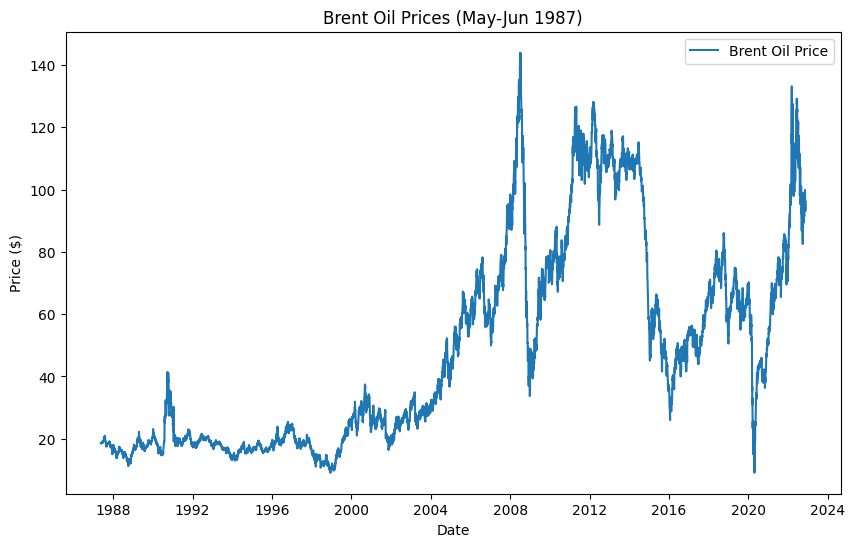

In [5]:
# Plot price series
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Price'], label='Brent Oil Price')
plt.title('Brent Oil Prices (May-Jun 1987)')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.show()

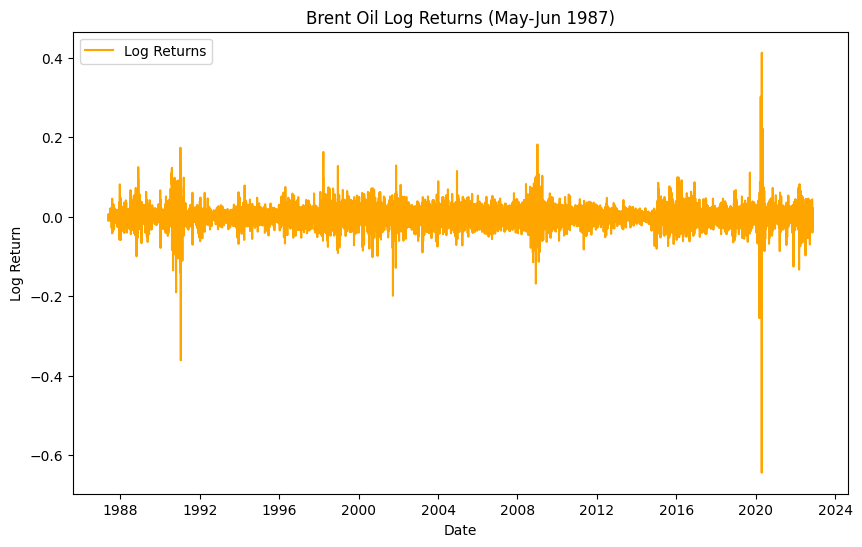

In [6]:
# Calculate log returns
df['Log_Return'] = np.log(df['Price'] / df['Price'].shift(1))

# Plot log returns
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Log_Return'], label='Log Returns', color='orange')
plt.title('Brent Oil Log Returns (May-Jun 1987)')
plt.xlabel('Date')
plt.ylabel('Log Return')
plt.legend()
plt.show()

In [7]:
# Test stationarity (ADF test)
result = adfuller(df['Price'].dropna())
print("\nADF Test for Prices - Statistic:", result[0], "p-value:", result[1])
result_returns = adfuller(df['Log_Return'].dropna())
print("ADF Test for Log Returns - Statistic:", result_returns[0], "p-value:", result_returns[1])


ADF Test for Prices - Statistic: -1.9938560113924675 p-value: 0.28927350489340287
ADF Test for Log Returns - Statistic: -16.42711349448591 p-value: 2.4985801611427818e-29
